In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

In [2]:
#first we process the training data
#making it into an array of labels and features
X_train = []
y_train = []
X_data = []
y_data = []

In [3]:
for i, line in enumerate(open('abalone_train.txt')):
    line = line.split(' ')
    #print(line)
    label = line[0]
    features = line[1:]
    #print(len(features))
    #print(features[len(features) - 1])
    fet_arr = [0.0]*8
    fet = features[0].split(':')
    
    for k in range(0, len(features) - 1):
        fet = features[k].split(':')
        fet_arr[k] = float(fet[1])
    #print(fet_arr)    
    X_train += [fet_arr]
    y_train += [float(label)]
        

In [4]:
for i, line in enumerate(open('abalone.txt')):
    line = line.split(' ')
    #print(line)
    label = line[0]
    features = line[1:]
    #print(len(features))
    #print(features[len(features) - 1])
    fet_arr = [0.0]*8
    fet = features[0].split(':')
    
    for k in range(0, len(features) - 1):
        fet = features[k].split(':')
        fet_arr[k] = float(fet[1])
    #print(fet_arr)    
    X_data += [fet_arr]
    y_data += [float(label)]

In [5]:
X_train

[[-1.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.0],
 [-1.0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.0],
 [0.0, 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.0],
 [-1.0, 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.0],
 [1.0, 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.0],
 [1.0, 0.425, 0.3, 0.095, 0.3515, 0.141, 0.0775, 0.0],
 [0.0, 0.53, 0.415, 0.15, 0.7775, 0.237, 0.1415, 0.0],
 [0.0, 0.545, 0.425, 0.125, 0.768, 0.294, 0.1495, 0.0],
 [-1.0, 0.475, 0.37, 0.125, 0.5095, 0.2165, 0.1125, 0.0],
 [0.0, 0.55, 0.44, 0.15, 0.8945, 0.3145, 0.151, 0.0],
 [0.0, 0.525, 0.38, 0.14, 0.6065, 0.194, 0.1475, 0.0],
 [-1.0, 0.43, 0.35, 0.11, 0.406, 0.1675, 0.081, 0.0],
 [-1.0, 0.49, 0.38, 0.135, 0.5415, 0.2175, 0.095, 0.0],
 [0.0, 0.535, 0.405, 0.145, 0.6845, 0.2725, 0.171, 0.0],
 [0.0, 0.47, 0.355, 0.1, 0.4755, 0.1675, 0.0805, 0.0],
 [-1.0, 0.5, 0.4, 0.13, 0.6645, 0.258, 0.133, 0.0],
 [1.0, 0.355, 0.28, 0.085, 0.2905, 0.095, 0.0395, 0.0],
 [0.0, 0.44, 0.34, 0.1, 0.451, 0.188, 0.087, 0.0],
 [-1.0

In [6]:
y_train

[1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,

In [7]:
# First we get data for adaBoost
adaboost_acc = [0.0] * 10
num_estimators = 100
for i in range(10):
    adaboost_clf = GradientBoostingClassifier(loss = 'exponential', n_estimators = num_estimators, max_depth = 1, random_state=0)
    adaboost_clf.fit(X_train, y_train)
    res = cross_validate(adaboost_clf, X_data, y_data, cv=10, return_train_score=True)
    adaboost_acc[i] = res['test_score'].mean()
    num_estimators += 100

In [8]:
# First we get data for Logistic Boost
logboost_acc = [0.0] * 10
num_estimators = 100
for i in range(10):
    logboost_clf = GradientBoostingClassifier(loss = 'deviance', n_estimators = num_estimators, max_depth = 1, random_state=0)
    logboost_clf.fit(X_train, y_train)
    res = cross_validate(logboost_clf, X_data, y_data, cv=10, return_train_score=True)
    logboost_acc[i] = res['test_score'].mean()
    num_estimators += 100

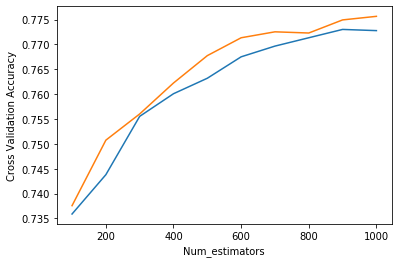

In [9]:
#plot result
parameter = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.plot(parameter, adaboost_acc, label = 'AdaBoost')
plt.plot(parameter, logboost_acc, label = 'LogitBoost')
plt.xlabel('Num_estimators')
plt.ylabel('Cross Validation Accuracy')
plt.show()

In [11]:
#The following is a hard-coded boosting code
#First we do Adaboost training

In [12]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [13]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [14]:
clf.score(X_train, y_train)

0.7874241940631982

In [15]:
clf.base_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
clf.base_estimator_.predict(X_train)

array([-1., -1.,  1., ...,  1.,  1.,  1.])

In [17]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impuri

In [18]:
# The following is the implementation of logistical boost, using the same set of estimators as before

In [19]:
hypothesis = clf.estimators_

In [20]:
print(len(hypothesis))

100


In [21]:
min_estimator = clf.base_estimator_
min_estimator.fit(X_train, y_train)
min_error = 1 - min_estimator.score(X_train, y_train)

In [22]:
# find min_error estimator with uniform distribution
for l in range(0, len(hypothesis)):
    hypothesis[l].fit(X_train, y_train)
    if hypothesis[l].score(X_train, y_train) < min_error:
        min_estimator = hypothesis[l]
        min_error = hypothesis[l].score(X_train, y_train)

In [23]:
min_error

0.2674752633258858

In [24]:
T = 50
alpha = np.log((1 - min_error)/min_error)
h = np.array(min_estimator.predict(X_train))
f = alpha * h
D_t = [0.0]*len(y_train)
Z_t = 0.0
# updating Z_t
for i in range(0, len(y_train)):
    D_t[i] = 1 / (1 + np.exp(y_train[i]*f[i]))
    Z_t += D_t[i]
D_t = np.array(D_t) / Z_t

In [25]:
D_t

array([0.00059666, 0.00021786, 0.00059666, ..., 0.00021786, 0.00021786,
       0.00021786])

In [26]:
np.sum(D_t)

1.000000000000007

In [27]:
hypo_num = 0
for t in range(1, T):
    error = 0.0
    weight = (np.array(hypothesis[0].predict(X_train)) - np.array(y_train)) / 2
    weight = np.absolute(weight)
    for j in range(len(y_train)): 
        error += D_t[j] * weight[j]
    min_error = error
    min_estimator = hypothesis[0]
    for m in range(1, len(hypothesis)):
        error = 0.0
        weight = (np.array(hypothesis[m].predict(X_train)) - np.array(y_train)) / 2
        weight = np.absolute(weight)
        for q in range(len(y_train)): 
            error += D_t[q] * weight[q]
        if error < min_error:
            min_error = error
            min_estimator = hypothesis[m]
            hypo_num = m
    #up to now we have found h
    print(hypo_num)
    print(min_error)
    alpha = np.log((1 - min_error)/min_error)
    h = np.array(min_estimator.predict(X_train))
    f += alpha * h
    #update distribution
    for i in range(0, len(y_train)):
        D_t[i] = 1 / (1 + np.exp(y_train[i]*f[i]))
        Z_t += D_t[i]
    D_t = np.array(D_t) / Z_t

0
0.4999999999999965
0
0.24999999999999328
0
0.2164471260132498
0
0.18693977444163312
0
0.16034659705393423
0
0.13885362525893202
0
0.12204683110697563
0
0.1087903956551057
0
0.09811875024049943
0
0.08935195881302507
0
0.08202306860801771
0
0.07580528909100948
0
0.0704637633819825
0
0.0658254541735104
0
0.061760069547137766
0
0.05816763251755428
0
0.05497014908608477
0
0.05210588103720883
0
0.04952532057499723
0
0.04718830465935229
0
0.04506190954329177
0
0.04311889002153442
0
0.041336505775141176
0
0.03969562725007115
0
0.03818004636132078
0
0.03677593929409175
0
0.03547144363625093
0
0.034256322426126945
0
0.03312169496413601
0
0.03205981940519192
0
0.03106391587230779
0
0.030128021545616168
0
0.02924687118054668
0
0.02841579799703486
0
0.02763065099970031
0
0.026887725636463963
0
0.02618370535084392
0
0.025515612082236978
0
0.024880764155729845
0
0.02427674030571331
0
0.02370134881562123
0
0.023152600944643525
0
0.022628687962349948
0
0.02212796123237935
0
0.021648914883122896
0
0.0

In [28]:
f = np.sign(f)

In [29]:
len(f)

3133

In [30]:
# finally we calculate the score of f
f_score = 0.0
weight = (f - np.array(y_train)) / 2
weight = np.absolute(weight)
for v in range(0, len(f)):
    f_score += weight[v]
f_score = 1.0 - (f_score / len(f))

In [31]:
1 - f_score

0.26747526332588567